# Part 1 :Basic ML Classification

## Importing the basic libraries

In [25]:
import torch
import torchvision

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch.nn as nn

## Loading the Iris dataset from skLearn

In [13]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [15]:
len(iris_df) , iris_df['target'].unique()

(150, array([0., 1., 2.]))

The datasets contains 150 samples alongwith 3 unique classes

## Splitting the Dataset into Training and testing datasets

In [16]:
X_train , X_test , y_train , y_test = train_test_split(iris_df.drop(labels = "target" , axis = 1) , iris_df["target"] , test_size = 0.2)

In [17]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(120, 30, 120, 30)

Splitting the dataset into 80% traing and 20% testing.

Next we will normalize the features.

In [23]:
# Creating a scaler to normalize the features
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled (first 5 rows):")
print(X_train_scaled[:5])
print("\nX_test_scaled (first 5 rows):")
print(X_test_scaled[:5])


X_train_scaled (first 5 rows):
[[-0.20540144 -0.57945956  0.16888418  0.12362985]
 [-1.04704636  1.05391638 -1.44319204 -1.2250594 ]
 [ 1.35765341  0.35389812  0.51432908  0.25849877]
 [ 1.59812339 -0.11278072  1.14764474  0.52823662]
 [-1.04704636  0.35389812 -1.50076619 -1.35992832]]

X_test_scaled (first 5 rows):
[[ 0.87671346 -0.34612014  0.45675493  0.12362985]
 [ 0.99694845  0.1205587   1.03249644  1.60718802]
 [-1.04704636  1.05391638 -1.27046959 -0.82045263]
 [ 0.15530353  0.82057696  0.39918078  0.52823662]
 [-0.92681137  1.75393463 -1.32804374 -1.2250594 ]]


### Creating a 2 layer Neural Network Architecture for building the classifier

In [26]:
class iris_classifier(nn.Module) :
    def __init__(self, input_size , hidden_size , num_classes) :
        super().__init__()
        self.fc1 = nn.Linear(in_features = input_size , out_features = hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features = hidden_size , out_features = num_classes)


    def forward(self , x) :
        return self.fc2(self.relu(self.fc1(x)))

Converting the data into tensors to feed into the model

In [31]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

print("\nX_train_tensor (first 5 rows):")
print(X_train_tensor[:5])
print("\nX_test_tensor (first 5 rows):")
print(X_test_tensor[:5])
print("\ny_train_tensor (first 5 elements):")
print(y_train_tensor[:5])
print("\ny_test_tensor (first 5 elements):")
print(y_test_tensor[:5])


X_train_tensor (first 5 rows):
tensor([[-0.2054, -0.5795,  0.1689,  0.1236],
        [-1.0470,  1.0539, -1.4432, -1.2251],
        [ 1.3577,  0.3539,  0.5143,  0.2585],
        [ 1.5981, -0.1128,  1.1476,  0.5282],
        [-1.0470,  0.3539, -1.5008, -1.3599]])

X_test_tensor (first 5 rows):
tensor([[ 0.8767, -0.3461,  0.4568,  0.1236],
        [ 0.9969,  0.1206,  1.0325,  1.6072],
        [-1.0470,  1.0539, -1.2705, -0.8205],
        [ 0.1553,  0.8206,  0.3992,  0.5282],
        [-0.9268,  1.7539, -1.3280, -1.2251]])

y_train_tensor (first 5 elements):
tensor([1, 0, 1, 2, 0])

y_test_tensor (first 5 elements):
tensor([1, 2, 0, 1, 0])


In [38]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

Building the training loop and testing loop

In [45]:
def test_step(model: torch.nn.Module,
              X_test: torch.Tensor,
              y_test: torch.Tensor,
              loss_fn: torch.nn.Module):
    model.eval()

    with torch.no_grad():
        # Forward pass
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)

        # Accuracy
        y_pred_classes = torch.argmax(y_pred, dim=1)
        correct = (y_pred_classes == y_test).sum().item()
        accuracy = correct / len(y_test)

    return loss.item(), accuracy


In [41]:
def test_step(model: torch.nn.Module,
              X_test: torch.Tensor,
              y_test: torch.Tensor,
              loss_fn: torch.nn.Module):
    """Performs a single evaluation step and returns loss and accuracy."""
    model.eval()

    with torch.no_grad():
        # Forward pass
        y_pred = model(X_test)

        # Compute loss
        loss = loss_fn(y_pred, y_test)

        # Calculate accuracy
        y_pred_classes = torch.argmax(y_pred, dim=1)
        correct = (y_pred_classes == y_test).sum().item()
        total = y_test.size(0)
        accuracy = correct / total

    return loss.item(), accuracy


In [84]:
import matplotlib.pyplot as plt

def train_model(model: torch.nn.Module,
                X_train: torch.Tensor,
                y_train: torch.Tensor,
                X_test: torch.Tensor,
                y_test: torch.Tensor,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                epochs: int = 50):

    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        train_loss, train_acc = train_step(model, X_train, y_train, loss_fn, optimizer)
        test_loss, test_acc = test_step(model, X_test, y_test, loss_fn)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1:02d}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Acc: {train_acc*100:.2f}% | "
              f"Test Loss: {test_loss:.4f}, Acc: {test_acc*100:.2f}%")

    return train_accuracies , test_accuracies

In [85]:
model = iris_classifier(input_size = 4 ,
                        hidden_size = 16 ,
                        num_classes = 3)
model

iris_classifier(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)

In [87]:
train_accuracies , test_accuracies = train_model(model , X_train_tensor , y_train_tensor , X_test_tensor , y_test_tensor , loss_fn = loss_fn , optimizer = optimizer , epochs = 50)

Epoch 01/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 02/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 03/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 04/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 05/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 06/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 07/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 08/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 09/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 10/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 11/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 12/50 | Train Loss: 1.0835, Acc: 31.67% | Test Loss: 1.0862, Acc: 33.33%
Epoch 13/50 | Train Loss: 1.0835, Acc: 31.67% | Test

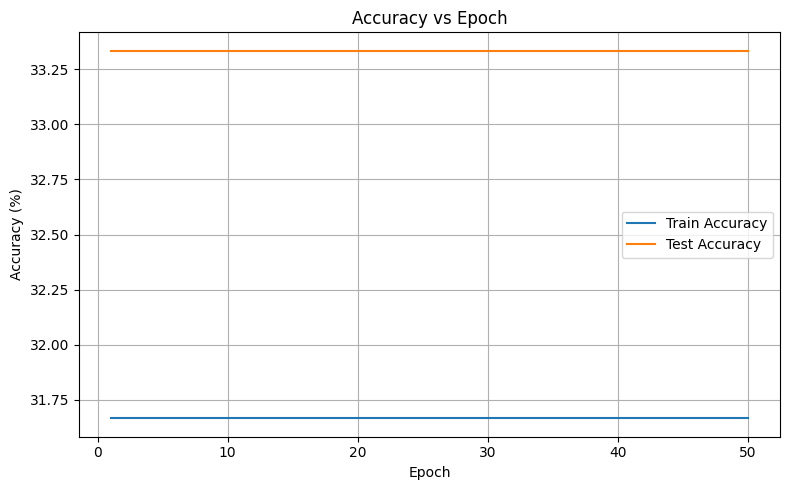

In [89]:
epochs = 50

 # Plot accuracy vs epoch
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), [acc * 100 for acc in train_accuracies], label="Train Accuracy")
plt.plot(range(1, epochs + 1), [acc * 100 for acc in test_accuracies], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()